In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family']=['Arial Unicode MS']
sns.set()
sns.set_style("whitegrid")

In [5]:
side = 28
input_size = side ** 2
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

In [6]:
train_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [7]:
test_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [9]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

Shuffle : random the index during each epoch

In [10]:
model = nn.Linear(input_size, num_classes)

In [11]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
total_step = len(train_loader)

Epoch [1/5], Step [100/600], Loss: 2.1785
Epoch [1/5], Step [200/600], Loss: 2.0983
Epoch [1/5], Step [300/600], Loss: 1.9943
Epoch [1/5], Step [400/600], Loss: 1.9504
Epoch [1/5], Step [500/600], Loss: 1.8081
Epoch [1/5], Step [600/600], Loss: 1.7684
Epoch [2/5], Step [100/600], Loss: 1.7296
Epoch [2/5], Step [200/600], Loss: 1.6859
Epoch [2/5], Step [300/600], Loss: 1.6365
Epoch [2/5], Step [400/600], Loss: 1.6000
Epoch [2/5], Step [500/600], Loss: 1.5507
Epoch [2/5], Step [600/600], Loss: 1.4198
Epoch [3/5], Step [100/600], Loss: 1.3418
Epoch [3/5], Step [200/600], Loss: 1.3417
Epoch [3/5], Step [300/600], Loss: 1.3746
Epoch [3/5], Step [400/600], Loss: 1.3187
Epoch [3/5], Step [500/600], Loss: 1.2202
Epoch [3/5], Step [600/600], Loss: 1.3338
Epoch [4/5], Step [100/600], Loss: 1.1129
Epoch [4/5], Step [200/600], Loss: 1.2883
Epoch [4/5], Step [300/600], Loss: 1.1556
Epoch [4/5], Step [400/600], Loss: 1.1644
Epoch [4/5], Step [500/600], Loss: 1.1171
Epoch [4/5], Step [600/600], Loss:

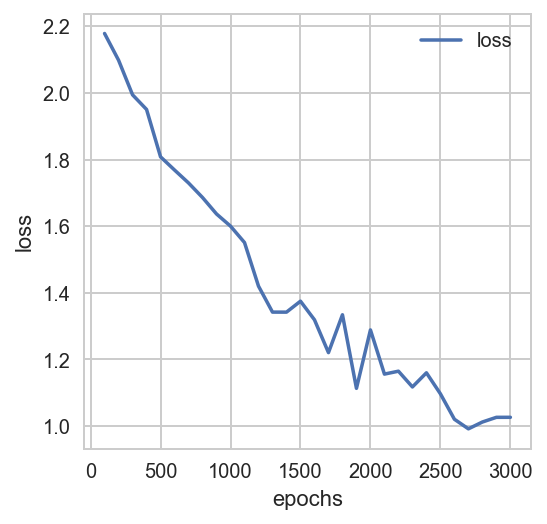

In [13]:
idx = []
losses = []
for epoch in range(1, num_epochs + 1):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch, num_epochs, i + 1, total_step, loss.item()))
            idx.append((epoch - 1) * total_step + i + 1)
            losses.append(loss.item())
            
plt.plot(idx, losses, label="loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [15]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size)
        outputs = model(images)
        pred = outputs.argmax(1)
        total += labels.size(0)
        correct += (pred == labels).sum()
        acc = correct.item() / total
    print("After {:5d} tests, accuracy is  : {:5f}".format(total, acc))

After 10000 tests, accuracy is  : 0.828400
